In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def weight(phi,dy=50.,p=1):
    return np.tanh(phi*p/(dy))
    #return np.tanh(phi*p/(dy))

    
def NewWeight(phi,dy=50.,p=1):
    if (phi>0):
        return 0.5*np.tanh(10*(phi*p/(dy)-0.5))+0.5
    else:
        return 0.5*np.tanh(10*(phi*p/(dy)+0.5))-0.5
    #return np.tanh(phi*p/(dy))

def sigma(phi):
    return 4.
    
def tau(phi):
    result = max(np.abs(phi)*(-1.0)+8.0, 4.0)
    return 6.

def w_Implementation(phi,**kwargs):
    return (1.0 - weight(phi,**kwargs))*sigma(phi) + weight(phi,**kwargs)*tau(phi) 


def wSigmaImplementation(sigma, phi, **kwargs):
        return (1.0 - weight(phi,**kwargs))*sigma + weight(phi,**kwargs)*tau(phi) 
    
    
def annot_max(x,y, ax=None):
    x=np.array(x)
    y=np.array(y) 
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)


In [3]:
philist=np.arange(0,75,0.02).tolist()
p = 3

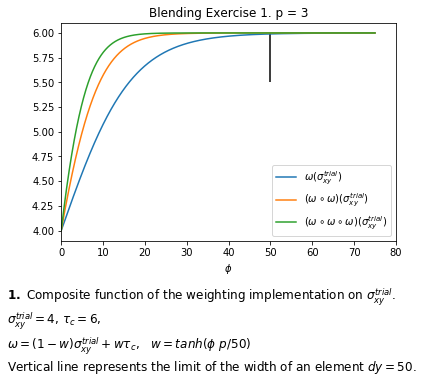

In [4]:
plt.xlim([0,80])


value1=[wSigmaImplementation(sigma(phi), phi,p=p) for phi in philist]
value2=[wSigmaImplementation(wSigmaImplementation(sigma(phi), phi,p=p), phi,p=p) for phi in philist]
value3=[wSigmaImplementation(wSigmaImplementation(wSigmaImplementation(sigma(phi), phi, p=p), phi, p=p), phi, p=p) for phi in philist]



plt.plot(philist, value1, label = r'$\omega(\sigma_{xy}^{trial})$')
plt.plot(philist, value2, label = r'$(\omega\circ\omega)(\sigma_{xy}^{trial})$')
plt.plot(philist, value3, label = r'$(\omega\circ\omega\circ\omega)(\sigma_{xy}^{trial})$')

plt.legend()
plt.xlabel("$\phi$")
plt.title("Blending Exercise 1. p = {}".format(p))
plt.vlines(50,5.5,6)

Caption1 =  r"""Composite function of the weighting implementation on $\sigma_{xy}^{trial}$.
$\sigma_{xy}^{trial}=4.$, $\tau_c=6$, 
$\omega=(1-w)\sigma_{xy}^{trial} + w\tau_c$,   $w=tanh(\phi\ p/50)$
Vertical line represents the limit of the width of an element $dy=50$."""


plt.figtext(0., -0.32, r"$\bf{1.}$ " + Caption1, horizontalalignment='left', fontsize=12)
plt.show()

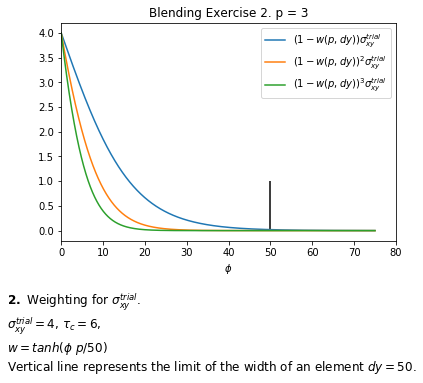

In [5]:
plt.xlim([0,80])


value4=[(1-weight(phi,p=p))*sigma(phi) for phi in philist]
value5=[((1-weight(phi,p=p))**2)*sigma(phi) for phi in philist]
value6=[((1-weight(phi,p=p))**3)*sigma(phi) for phi in philist]



plt.plot(philist, value4, label = r'$(1-w(p,dy))\sigma_{xy}^{trial}$')
plt.plot(philist, value5, label = r'$(1-w(p,dy))^2\sigma_{xy}^{trial}$')
plt.plot(philist, value6, label = r'$(1-w(p,dy))^3\sigma_{xy}^{trial}$')

plt.legend()
plt.xlabel("$\phi$")
plt.title("Blending Exercise 2. p = {}".format(p))
plt.vlines(50,0,1)

Caption1 =  r"""Weighting for $\sigma_{xy}^{trial}$.
$\sigma_{xy}^{trial}=4.$, $\tau_c=6$, 
$w=tanh(\phi\ p/50)$
Vertical line represents the limit of the width of an element $dy=50$."""


plt.figtext(0., -0.32, r"$\bf{2.}$ " + Caption1, horizontalalignment='left', fontsize=12)
plt.show()

----------------------

In [6]:
def sigma(phi):
    return np.log(4*phi+1)




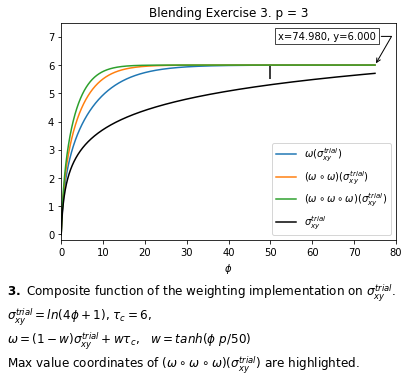

In [7]:
plt.xlim([0,80])
plt.ylim([-.2,7.5])

value1=[wSigmaImplementation(sigma(phi), phi,p=p) for phi in philist]
value2=[wSigmaImplementation(wSigmaImplementation(sigma(phi), phi,p=p), phi,p=p) for phi in philist]
value3=[wSigmaImplementation(wSigmaImplementation(wSigmaImplementation(sigma(phi), phi, p=p), phi, p=p), phi, p=p) for phi in philist]

fx=[sigma(phi) for phi in philist]

plt.plot(philist, value1, label = r'$\omega(\sigma_{xy}^{trial})$')
plt.plot(philist, value2, label = r'$(\omega\circ\omega)(\sigma_{xy}^{trial})$')
plt.plot(philist, value3, label = r'$(\omega\circ\omega\circ\omega)(\sigma_{xy}^{trial})$')
plt.plot(philist, fx,c="k", label = r'$\sigma_{xy}^{trial}$')



plt.legend()
plt.xlabel("$\phi$")
plt.title("Blending Exercise 3. p = {}".format(p))
plt.vlines(50,5.5,6)

Caption1 =  r"""Composite function of the weighting implementation on $\sigma_{xy}^{trial}$.
$\sigma_{xy}^{trial}=ln(4\phi+1)$, $\tau_c=6$, 
$\omega=(1-w)\sigma_{xy}^{trial} + w\tau_c$,   $w=tanh(\phi\ p/50)$
Max value coordinates of $(\omega\circ\omega\circ\omega)(\sigma_{xy}^{trial})$ are highlighted."""

annot_max(philist,value3, ax=None)

plt.figtext(0., -0.32, r"$\bf{3.}$ " + Caption1, horizontalalignment='left', fontsize=12)
plt.show()

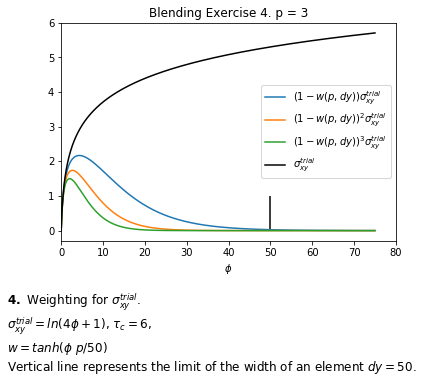

In [8]:
plt.xlim([0,80])


value4=[(1-weight(phi,p=p))*sigma(phi) for phi in philist]
value5=[((1-weight(phi,p=p))**2)*sigma(phi) for phi in philist]
value6=[((1-weight(phi,p=p))**3)*sigma(phi) for phi in philist]
fx=[sigma(phi) for phi in philist]



plt.plot(philist, value4, label = r'$(1-w(p,dy))\sigma_{xy}^{trial}$')
plt.plot(philist, value5, label = r'$(1-w(p,dy))^2\sigma_{xy}^{trial}$')
plt.plot(philist, value6, label = r'$(1-w(p,dy))^3\sigma_{xy}^{trial}$')
plt.plot(philist, fx,c="k", label = r'$\sigma_{xy}^{trial}$')


plt.legend()
plt.xlabel("$\phi$")
plt.title("Blending Exercise 4. p = {}".format(p))
plt.vlines(50,0,1)

Caption1 =  r"""Weighting for $\sigma_{xy}^{trial}$.
$\sigma_{xy}^{trial}=ln(4\phi+1)$, $\tau_c=6$, 
$w=tanh(\phi\ p/50)$
Vertical line represents the limit of the width of an element $dy=50$."""


plt.figtext(0., -0.32, r"$\bf{4.}$ " + Caption1, horizontalalignment='left', fontsize=12)
plt.show()

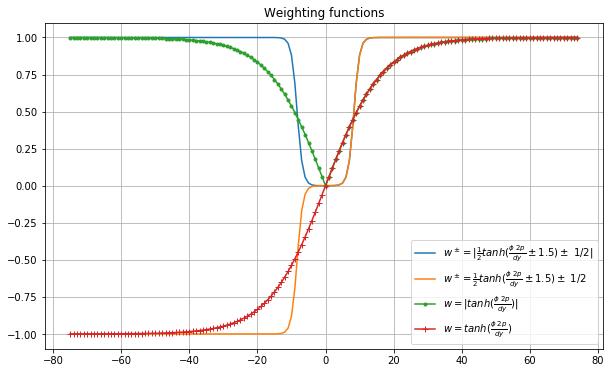

In [9]:
philist=np.arange(-75,75,1.).tolist()
p = 3
plt.figure(figsize= [10, 6])
plt.plot(philist,[np.abs(NewWeight(phi,p=p)) for phi in philist], label = r"$w^\pm=|\frac{1}{2}tanh(\frac{\phi\ 2p}{dy}\pm1.5)\pm\ 1/2|$")
plt.plot(philist,[NewWeight(phi,p=p) for phi in philist],label = r"$w^\pm=\frac{1}{2}tanh(\frac{\phi\ 2p}{dy}\pm1.5)\pm\ 1/2$")


plt.plot(philist,[np.abs(weight(phi,p=p)) for phi in philist], label = r"$w=|tanh(\frac{\phi\ 2p}{dy})|$", marker=".")
plt.plot(philist,[weight(phi,p=p) for phi in philist], label = r"$w=tanh(\frac{\phi\ 2p}{dy})$",marker = "+")

plt.title("Weighting functions")
plt.grid()
plt.legend()
plt.show()